# Image Classification Deep Learning
This Notebook provide the example case for image classification using deep learnin. To be precised, this will show the use of transfer learning
## Import Libraries and Preprocess Data

In [1]:
import numpy as nnp
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
import os
from sklearn.metrics import classification_report


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
image_path1 = '/home/mjanuadi/image_classification_TransferLearning/data/Food Classification'
class_names = os.listdir(image_path1)
num_class = len(class_names)


### Let's Visualize Our Image

In [26]:
# Let's visualize\
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the traget directory
  target_folder = target_dir + target_class

  # Get random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f"Image shape: {img.shape}")
  return img

['020.jpg']
Image shape: (630, 1200, 3)


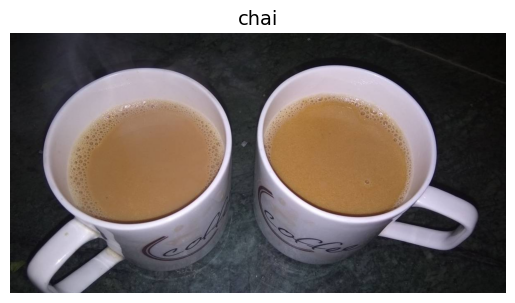

In [30]:
img = view_random_image(target_dir = "/home/mjanuadi/image_classification_TransferLearning/dataset/train/",
                        target_class = "chai")

['199.jpg']
Image shape: (1500, 999, 3)


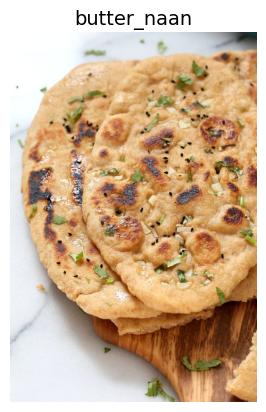

In [32]:
img = view_random_image(target_dir = "/home/mjanuadi/image_classification_TransferLearning/dataset/train/",
                        target_class = "butter_naan")

### Let's Preprocess Our Image Data

In [5]:
train_datagen = ImageDataGenerator(rescale= 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split = 0.2)

In [6]:
train_generator = train_datagen.flow_from_directory(image_path1, batch_size = 32,
                                                     class_mode = 'categorical', target_size = (224,224),
                                                     subset='training', shuffle=None, seed=250)


Found 1529 images belonging to 6 classes.


In [7]:
validation_generator = train_datagen.flow_from_directory(image_path1, batch_size=32,
                                                         class_mode = 'categorical', target_size = (224,224),
                                                         subset='validation', shuffle=None, seed=250)


Found 378 images belonging to 6 classes.


In [8]:
true_class = validation_generator.classes
true_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

### Model Trainin
Let's Use Transfer Learning for Building Our Deep Learning Model
There are five pretrained model will be used here:
1. Inception V3
2. ResNet50
3. Xcpetion
4. MobileNet
5. EfficientNet

#### Transfer Learning - Inception V3

In [9]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(input_shape = (224,224,3),
                                include_top = False, weights = 'imagenet')
for layer in pre_trained_model.layers:
  layer.trainable = False

2024-05-28 23:40:27.900882: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-28 23:40:27.941614: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-28 23:40:27.941664: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-28 23:40:27.942480: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

In [13]:
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(num_class, activation = 'sigmoid')(x)
model = Model(pre_trained_model.input, x)

model.compile(optimizer = RMSprop(learning_rate = 0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
epochs = 50
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    steps_per_epoch = 5,
                    epochs = epochs)

Epoch 1/50
5/5 [==============================] - 297s 65s/step - loss: 1.5185 - accuracy: 0.2000 - val_loss: 0.6345 - val_accuracy: 0.2063
Epoch 2/50
5/5 [==============================] - 46s 8s/step - loss: 0.5637 - accuracy: 0.5875 - val_loss: 0.5011 - val_accuracy: 0.3651
Epoch 3/50
5/5 [==============================] - 106s 23s/step - loss: 0.5609 - accuracy: 0.4000 - val_loss: 0.4079 - val_accuracy: 0.5053
Epoch 4/50
5/5 [==============================] - 61s 15s/step - loss: 0.5219 - accuracy: 0.1000 - val_loss: 0.4401 - val_accuracy: 0.2249
Epoch 5/50
5/5 [==============================] - 38s 9s/step - loss: 0.4780 - accuracy: 0.2937 - val_loss: 0.3899 - val_accuracy: 0.3783
Epoch 6/50
5/5 [==============================] - 88s 12s/step - loss: 0.4394 - accuracy: 0.2750 - val_loss: 0.4165 - val_accuracy: 0.2407
Epoch 7/50
5/5 [==============================] - 30s 7s/step - loss: 0.4382 - accuracy: 0.4052 - val_loss: 0.4465 - val_accuracy: 0.3069
Epoch 8/50
5/5 [============

In [15]:
pred = model.predict(validation_generator)
predicted_class = pred.argmax(axis = 1)
predicted_class

12/12 [==============================] - 14s 1s/step


array([2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 5, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2,
       2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 2, 3, 1, 2, 3, 3, 3, 2, 1, 3,
       2, 3, 3, 3, 1, 2, 2, 3, 2, 3, 3, 5, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       0, 2, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 5, 4, 1, 5, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2,
       4, 4, 4, 4, 4, 1, 4, 2, 3, 4, 4, 4, 4, 4, 1,

In [16]:
true_class = validation_generator.classes
true_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [17]:
print(classification_report(true_class, predicted_class))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88        65
           1       0.85      1.00      0.92        76
           2       0.61      0.95      0.74        57
           3       0.96      0.53      0.68        47
           4       1.00      0.76      0.86        63
           5       0.86      0.90      0.88        70

    accuracy                           0.84       378
   macro avg       0.88      0.82      0.83       378
weighted avg       0.88      0.84      0.84       378



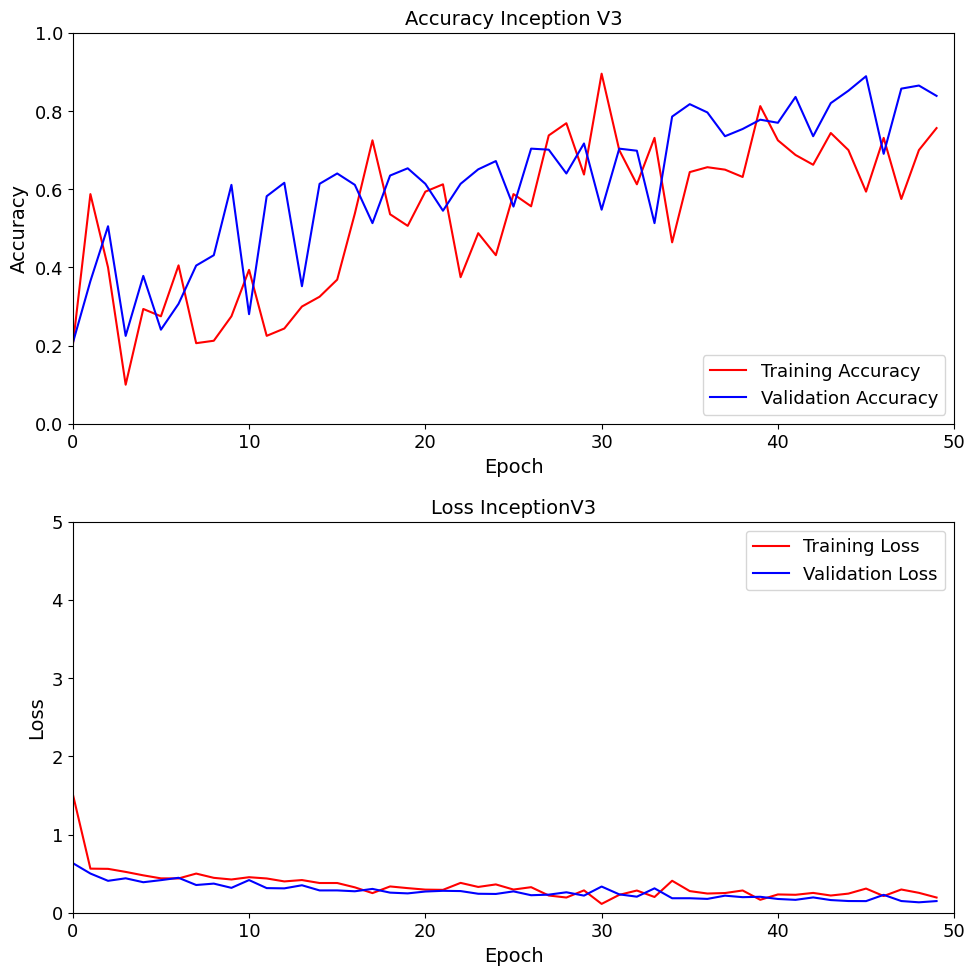

In [18]:
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 13
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=MEDIUM_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.rc('legend', fontsize=MEDIUM_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, color='red', label='Training Accuracy')
plt.plot(epochs_range, val_acc, color='blue', label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.axis([0, 50, 0, 1])
plt.legend(loc='lower right')

plt.title('Accuracy Inception V3')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, color='red', label='Training Loss')
plt.plot(epochs_range, val_loss, color='blue', label='Validation Loss')
plt.legend(loc='upper right')
plt.axis([0, 50, 0, 5])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss InceptionV3')
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
plt.show()

#### Transfer Learning - ResNet50 

In [20]:
from tensorflow.keras.applications.resnet50 import ResNet50

ttl = 'Arsitektur ResNet50'

pre_trained_model = ResNet50(input_shape = (224,224,3), include_top = False, weights = 'imagenet')

for layer in pre_trained_model.layers:
  layer.trainable = False

In [22]:
resnet_model = Sequential()
resnet_model.add(pre_trained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(num_class, activation = 'softmax'))

resnet_model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'categorical_crossentropy',
                     metrics=['accuracy'])

epochs = 50
history = resnet_model.fit(train_generator,
                           validation_data = validation_generator,
                           steps_per_epoch = 5,
                           epochs = epochs)

Epoch 1/50
5/5 [==============================] - 36s 5s/step - loss: 92.7606 - accuracy: 0.3438 - val_loss: 97.3390 - val_accuracy: 0.1508
Epoch 2/50
5/5 [==============================] - 21s 5s/step - loss: 55.0602 - accuracy: 0.0000e+00 - val_loss: 54.0156 - val_accuracy: 0.1243
Epoch 3/50
5/5 [==============================] - 20s 5s/step - loss: 53.2364 - accuracy: 0.0000e+00 - val_loss: 30.4151 - val_accuracy: 0.1243
Epoch 4/50
5/5 [==============================] - 26s 6s/step - loss: 42.1824 - accuracy: 0.2000 - val_loss: 15.5451 - val_accuracy: 0.2011
Epoch 5/50
5/5 [==============================] - 20s 5s/step - loss: 6.1523 - accuracy: 0.6000 - val_loss: 11.5124 - val_accuracy: 0.1720
Epoch 6/50
5/5 [==============================] - 21s 5s/step - loss: 6.3395 - accuracy: 0.2500 - val_loss: 11.5906 - val_accuracy: 0.2116
Epoch 7/50
5/5 [==============================] - 18s 4s/step - loss: 11.5764 - accuracy: 0.2000 - val_loss: 8.9717 - val_accuracy: 0.2460
Epoch 8/50
5/5 

In [23]:
prediction = resnet_model.predict(validation_generator)
predicted_class = prediction.argmax(axis=-1)
predicted_class

12/12 [==============================] - 18s 1s/step


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [24]:
print(classification_report(true_class, predicted_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.00      0.00      0.00        76
           2       0.15      1.00      0.26        57
           3       0.00      0.00      0.00        47
           4       0.00      0.00      0.00        63
           5       0.00      0.00      0.00        70

    accuracy                           0.15       378
   macro avg       0.03      0.17      0.04       378
weighted avg       0.02      0.15      0.04       378



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


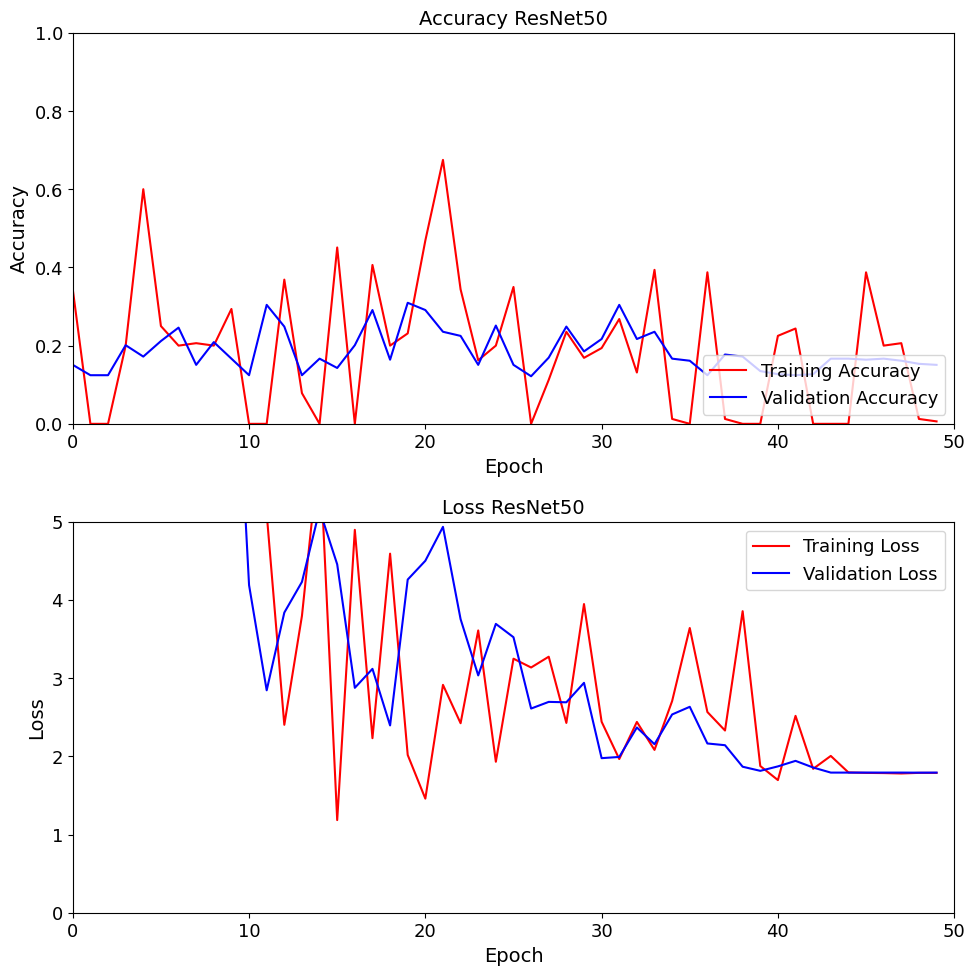

In [26]:
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 13
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=MEDIUM_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.rc('legend', fontsize=MEDIUM_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, color='red', label='Training Accuracy')
plt.plot(epochs_range, val_acc, color='blue', label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.axis([0, 50, 0, 1])
plt.legend(loc='lower right')

plt.title('Accuracy ResNet50')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, color='red', label='Training Loss')
plt.plot(epochs_range, val_loss, color='blue', label='Validation Loss')
plt.legend(loc='upper right')
plt.axis([0, 50, 0, 5])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss ResNet50')
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
plt.show()

#### Transfer Learning - Xception

In [10]:
from tensorflow.keras.applications.xception import Xception

pre_trained_model = Xception(input_shape = (224,224,3), include_top = False, weights = 'imagenet')

for layer in pre_trained_model.layers:
  layer.trainable = False

In [11]:
model = Sequential()
model.add(pre_trained_model)
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(num_class, activation = 'softmax'))

model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'categorical_crossentropy',
              metrics=['accuracy'])

epochs=50
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    steps_per_epoch = 5,
                    epochs = epochs)

Epoch 1/50


2024-05-28 23:42:09.616395: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100
2024-05-28 23:42:11.139263: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-28 23:42:12.590461: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.55GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2024-05-28 23:42:12.590528: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.55GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2024-05-28 23:42:12.736162: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.3

1/5 [=====>........................] - ETA: 24s - loss: 0.8464 - accuracy: 0.8750

2024-05-28 23:42:13.065318: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.47GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2024-05-28 23:42:13.065384: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.47GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2024-05-28 23:42:13.138938: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


5/5 [==============================] - ETA: 0s - loss: 160.7775 - accuracy: 0.1750

2024-05-28 23:42:20.613851: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.46GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2024-05-28 23:42:20.613916: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.46GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2024-05-28 23:42:20.742188: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.29GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2024-05-28 23:42:20.742262: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Alloc

5/5 [==============================] - 14s 2s/step - loss: 160.7775 - accuracy: 0.1750 - val_loss: 201.5240 - val_accuracy: 0.1667
Epoch 2/50
5/5 [==============================] - 7s 2s/step - loss: 148.5693 - accuracy: 0.0000e+00 - val_loss: 89.1466 - val_accuracy: 0.1508
Epoch 3/50
5/5 [==============================] - 8s 2s/step - loss: 69.9941 - accuracy: 0.2062 - val_loss: 34.3284 - val_accuracy: 0.4048
Epoch 4/50
5/5 [==============================] - 7s 2s/step - loss: 8.2398 - accuracy: 0.5312 - val_loss: 20.8148 - val_accuracy: 0.3704
Epoch 5/50
5/5 [==============================] - 7s 2s/step - loss: 13.4662 - accuracy: 0.2000 - val_loss: 11.6913 - val_accuracy: 0.2249
Epoch 6/50
5/5 [==============================] - 7s 2s/step - loss: 8.8371 - accuracy: 0.0688 - val_loss: 2.9727 - val_accuracy: 0.3360
Epoch 7/50
5/5 [==============================] - 8s 2s/step - loss: 1.7159 - accuracy: 0.4183 - val_loss: 1.2651 - val_accuracy: 0.4788
Epoch 8/50
5/5 [===================

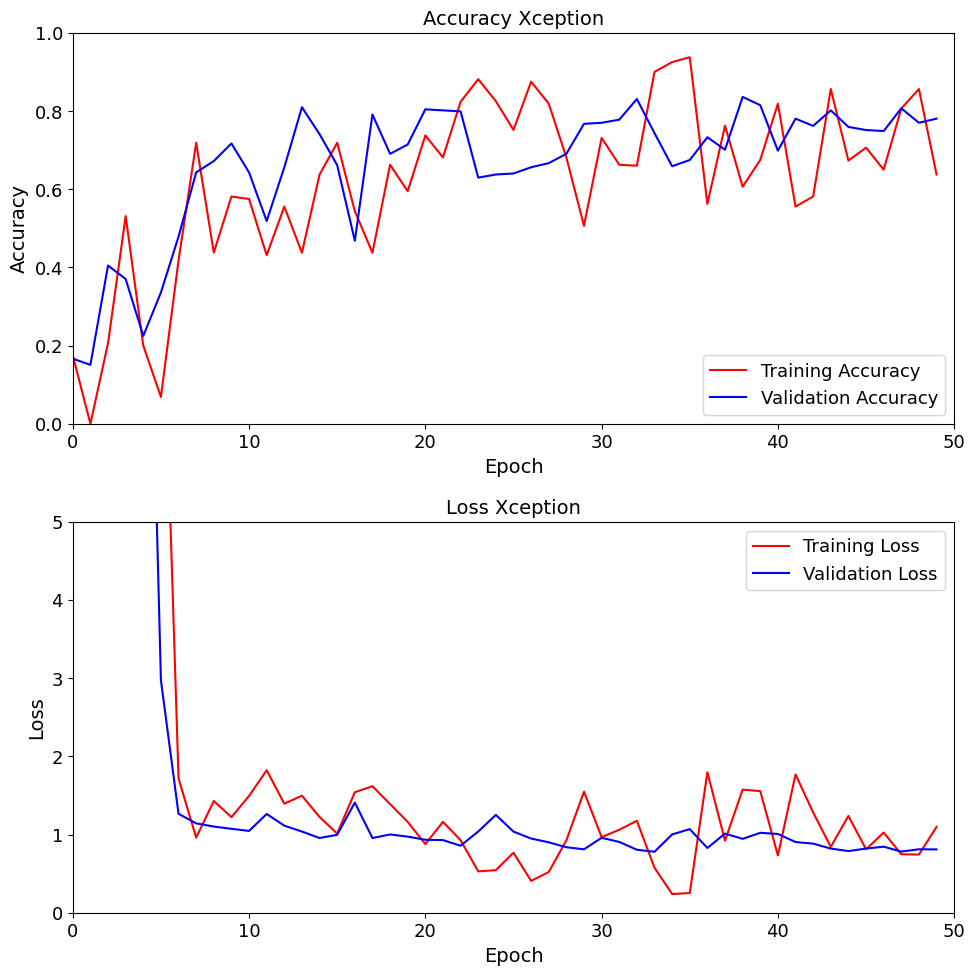

In [12]:
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 13
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=MEDIUM_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.rc('legend', fontsize=MEDIUM_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, color='red', label='Training Accuracy')
plt.plot(epochs_range, val_acc, color='blue', label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.axis([0, 50, 0, 1])
plt.legend(loc='lower right')

plt.title('Accuracy Xception')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, color='red', label='Training Loss')
plt.plot(epochs_range, val_loss, color='blue', label='Validation Loss')
plt.legend(loc='upper right')
plt.axis([0, 50, 0, 5])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss Xception')
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
plt.show()

In [13]:
predict = model.predict_generator(validation_generator, len(validation_generator))
class_predict = predict.argmax(axis=1)

/tmp/ipykernel_1302/3764206045.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(validation_generator, len(validation_generator))


In [14]:
print(classification_report(true_class, class_predict))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        65
           1       0.82      1.00      0.90        76
           2       0.93      0.67      0.78        57
           3       1.00      0.17      0.29        47
           4       0.70      0.97      0.81        63
           5       0.66      0.70      0.68        70

    accuracy                           0.78       378
   macro avg       0.82      0.74      0.72       378
weighted avg       0.81      0.78      0.75       378



MobileNetV2

In [15]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

pre_trained_model = MobileNetV2(input_shape = (224,224,3), include_top = False, weights = 'imagenet')

for layer in pre_trained_model.layers:
  layer.trainable = False

9420800/9406464 [==============================] - 13s 1us/step


In [17]:
model = Sequential()
model.add(pre_trained_model)
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(num_class, activation = 'softmax'))

model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'categorical_crossentropy',
              metrics=['accuracy'])

epochs=50
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    steps_per_epoch = 5,
                    epochs = epochs)

Epoch 1/50
5/5 [==============================] - 10s 2s/step - loss: 159.3729 - accuracy: 0.1750 - val_loss: 222.9078 - val_accuracy: 0.2011
Epoch 2/50
5/5 [==============================] - 8s 2s/step - loss: 206.9310 - accuracy: 0.0000e+00 - val_loss: 23.3493 - val_accuracy: 0.3492
Epoch 3/50
5/5 [==============================] - 7s 2s/step - loss: 13.1082 - accuracy: 0.3063 - val_loss: 10.2017 - val_accuracy: 0.2698
Epoch 4/50
5/5 [==============================] - 8s 2s/step - loss: 7.9732 - accuracy: 0.3529 - val_loss: 8.0712 - val_accuracy: 0.4206
Epoch 5/50
5/5 [==============================] - 7s 2s/step - loss: 15.1797 - accuracy: 0.0000e+00 - val_loss: 4.1696 - val_accuracy: 0.4497
Epoch 6/50
5/5 [==============================] - 8s 2s/step - loss: 3.0433 - accuracy: 0.4875 - val_loss: 1.6718 - val_accuracy: 0.5370
Epoch 7/50
5/5 [==============================] - 8s 2s/step - loss: 1.1631 - accuracy: 0.5125 - val_loss: 1.3832 - val_accuracy: 0.4630
Epoch 8/50
5/5 [======

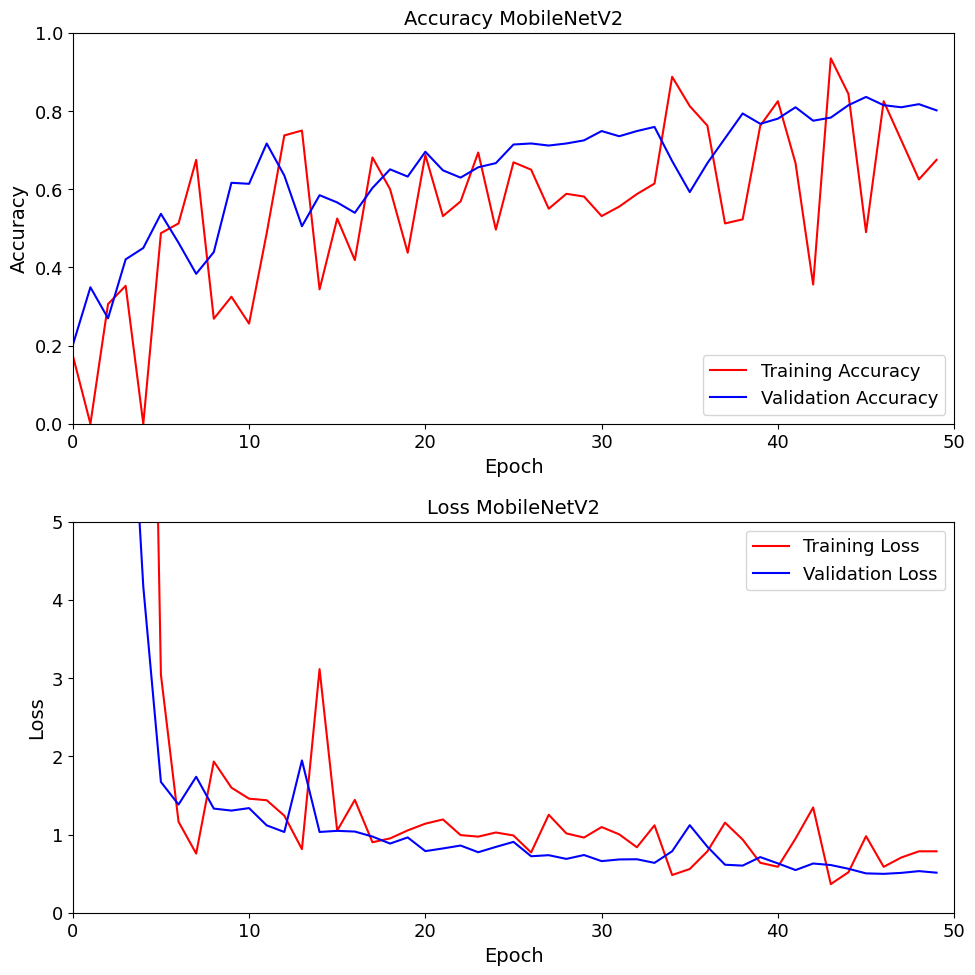

In [18]:
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 13
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=MEDIUM_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.rc('legend', fontsize=MEDIUM_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, color='red', label='Training Accuracy')
plt.plot(epochs_range, val_acc, color='blue', label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.axis([0, 50, 0, 1])
plt.legend(loc='lower right')

plt.title('Accuracy MobileNetV2')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, color='red', label='Training Loss')
plt.plot(epochs_range, val_loss, color='blue', label='Validation Loss')
plt.legend(loc='upper right')
plt.axis([0, 50, 0, 5])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss MobileNetV2')
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
plt.show()

In [19]:
predict = model.predict_generator(validation_generator, len(validation_generator))
class_predict = predict.argmax(axis=1)

/tmp/ipykernel_1302/3764206045.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(validation_generator, len(validation_generator))


In [20]:
print(classification_report(true_class, class_predict))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85        65
           1       0.68      1.00      0.81        76
           2       0.68      0.89      0.77        57
           3       1.00      0.06      0.12        47
           4       0.97      0.89      0.93        63
           5       0.89      0.94      0.92        70

    accuracy                           0.80       378
   macro avg       0.86      0.77      0.73       378
weighted avg       0.85      0.80      0.77       378



#### Transfer Learning - EfficientNet

In [21]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0

pre_trained_model = EfficientNetB0(input_shape = (224,224,3), include_top = False, weights = 'imagenet')

for layer in pre_trained_model.layers:
  layer.trainable = False

In [22]:
model = Sequential()
model.add(pre_trained_model)
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(num_class, activation = 'softmax'))

model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'categorical_crossentropy',
              metrics=['accuracy'])

epochs=50
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    steps_per_epoch = 5,
                    epochs = epochs)

Epoch 1/50
5/5 [==============================] - 15s 3s/step - loss: 47.2797 - accuracy: 0.4125 - val_loss: 134.9485 - val_accuracy: 0.1667
Epoch 2/50
5/5 [==============================] - 9s 2s/step - loss: 104.3511 - accuracy: 0.2000 - val_loss: 40.3924 - val_accuracy: 0.1720
Epoch 3/50
5/5 [==============================] - 9s 2s/step - loss: 25.5628 - accuracy: 0.0000e+00 - val_loss: 11.0811 - val_accuracy: 0.1508
Epoch 4/50
5/5 [==============================] - 9s 2s/step - loss: 4.8608 - accuracy: 0.2092 - val_loss: 19.9205 - val_accuracy: 0.1508
Epoch 5/50
5/5 [==============================] - 10s 2s/step - loss: 22.2976 - accuracy: 0.0000e+00 - val_loss: 17.5166 - val_accuracy: 0.1667
Epoch 6/50
5/5 [==============================] - 9s 2s/step - loss: 22.6096 - accuracy: 0.2000 - val_loss: 12.0923 - val_accuracy: 0.2011
Epoch 7/50
5/5 [==============================] - 9s 2s/step - loss: 8.6092 - accuracy: 0.4000 - val_loss: 8.4041 - val_accuracy: 0.2011
Epoch 8/50
5/5 [==

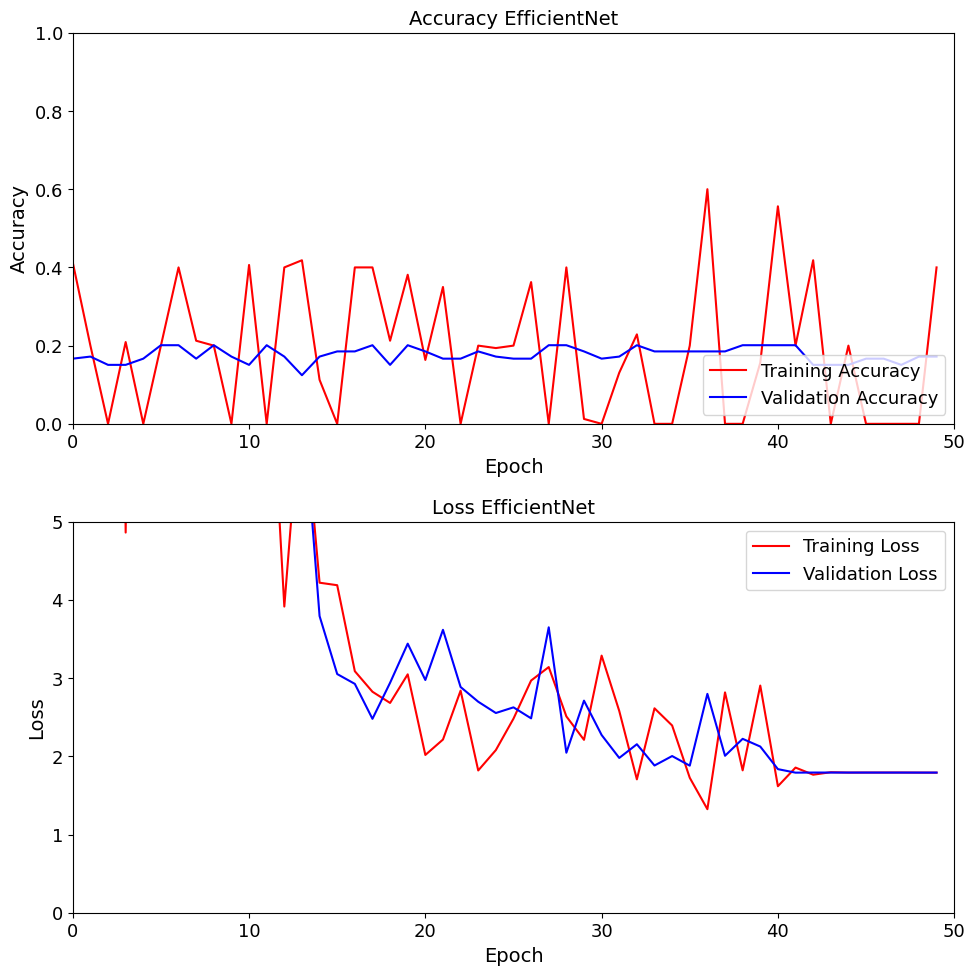

In [23]:
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 13
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=MEDIUM_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.rc('legend', fontsize=MEDIUM_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, color='red', label='Training Accuracy')
plt.plot(epochs_range, val_acc, color='blue', label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.axis([0, 50, 0, 1])
plt.legend(loc='lower right')

plt.title('Accuracy EfficientNet')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, color='red', label='Training Loss')
plt.plot(epochs_range, val_loss, color='blue', label='Validation Loss')
plt.legend(loc='upper right')
plt.axis([0, 50, 0, 5])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss EfficientNet')
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
plt.show()

In [24]:
predict = model.predict_generator(validation_generator, len(validation_generator))
class_predict = predict.argmax(axis=1)

/tmp/ipykernel_1302/3764206045.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(validation_generator, len(validation_generator))


In [25]:
print(classification_report(true_class, class_predict))

              precision    recall  f1-score   support

           0       0.17      1.00      0.29        65
           1       0.00      0.00      0.00        76
           2       0.00      0.00      0.00        57
           3       0.00      0.00      0.00        47
           4       0.00      0.00      0.00        63
           5       0.00      0.00      0.00        70

    accuracy                           0.17       378
   macro avg       0.03      0.17      0.05       378
weighted avg       0.03      0.17      0.05       378



/home/mjanuadi/anaconda3/envs/image-dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mjanuadi/anaconda3/envs/image-dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mjanuadi/anaconda3/envs/image-dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta